Cuando nuestros datos no tienen etiquetas (por ejemplo 0= Sano, 1= Enfermo), podemos buscar patrones mediante el algoritmos de **Aprendizaje no supervisado**. En esta notebook voy a utilizar K-Means y K-Means Mini-Batch para agrupar los datos de flores del dataset **Iris**. Asimismo, veremos que la bondad del modelo y una comparación de la eficiencia en tiempo lograda con K-Means Mini Batch. 

In [1]:
#Importamos las librerias y el dataset iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn import metrics


#Importamos Iris
iris = datasets.load_iris()

#Convertimos Iris en un data frame de pandas
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


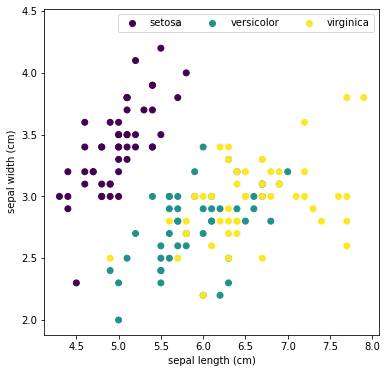

In [4]:
#Seleccionamos sepal length (cm) y sepal width (cm) y observamos como se distribuyen entre estas
# dos variables las especies de flores.


fig = plt.figure(figsize =(6,6))

viridis = plt.cm.get_cmap('viridis', 3)

legend = [
    plt.scatter([], [], marker='o', label= 'setosa', edgecolors = viridis(0), c=viridis(0)),
    plt.scatter([], [], marker='o', label='versicolor', edgecolors = viridis(1), c=viridis(1)),
    plt.scatter([], [], marker='o', label='virginica', edgecolors = viridis(2), c=viridis(2))
]


plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'], c= df['target'], cmap= 'viridis')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(handles=legend, loc='upper right', ncol=3)
plt.show()

## Aplicamos el modelo Kmeans



In [10]:
#Importamos las librerias:
# time para medir el tiempo de ejecución del script
# metrics para obtener la bondad del ajuste del modelo
import time
from sklearn import metrics


# Guardamos en un objeto los datos sin target

x = df.drop(['target'], axis= 1)
x
# plantamos una semilla aleatoria

np.random.seed(123)

#Instanciamos el modelo

model_k_means = KMeans(n_clusters=3, max_iter=2000) 

#Instanciamos el momento 0
t0 = time.time()

#Entrenamos el modelo
model_k_means.fit(x)

#Capturamos el tiempo luego de entrenar el modelo menos el momento 0
t_batch = time.time() - t0


print("-------------------------")
print("---Tiempo de ejecución---")
print("-------",round(t_batch,2),"--------")
print("-------------------------")

#Generamos las predicciones

pred_k_means = model_k_means.predict(x)

#Obtenemos las métricas de error

score=metrics.adjusted_rand_score(df['target'], pred_k_means)

print("-----------------------------")
print("------Indice Rand------------")
print("El score obtenido es: ",round(score,3))
print("-----------------------------")



-------------------------
---Tiempo de ejecución---
------- 0.08 --------
-------------------------
-----------------------------
------Indice Rand------------
El score obtenido es:  0.73
-----------------------------


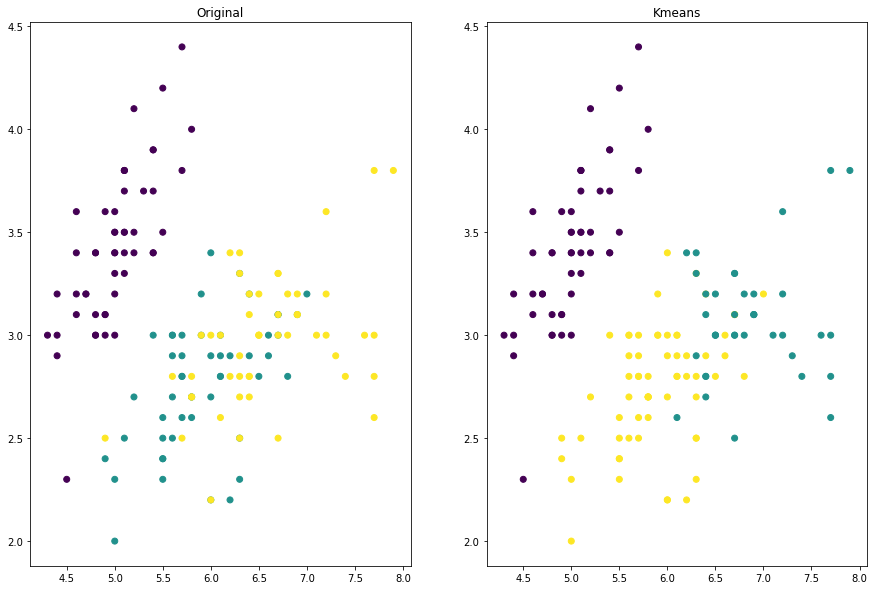

In [21]:
#Graficamos el dataset original y el predicho por kmeans

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title("Original")
ax[1].set_title("Kmeans")

ax[0].scatter(df['sepal length (cm)'],df['sepal width (cm)'], c= df['target'], cmap= 'viridis')
ax[1].scatter(x['sepal length (cm)'],x['sepal width (cm)'], c= pred_k_means, cmap= 'viridis')

plt.show()